# Dimensionality Reduction
Generally following `Machine Learning with Python 3rd Edition, Chapter 5`.

- Also known as feature extraction.  
- Maps the original feature space into a lower subspace with lower dimensionality than the original one.  
- This lower dimensional subspace should be less sparse, have features that are less correlated with each other, and explain a signficant amount of the original variance in the full feature space.

### Potential Benefits
- Less data to deal with.  
- Less spareness.  
- Helps with overfitting and bias issues.  
- Can leverage compression to be able to [visualize high-dimensional data](https://projector.tensorflow.org) in lower dimensions that retain characteristics of the overall variance.  
- Can make the data more conducive to modeling with kernel transformations.  
- May be able to visualize the high-dimensional data in 2 or 3-dimension space.

### Cons  
- Not as intrepretable.  
- Some compression is intensive.  

> Think of this as compression, essentially the same thing as compressing a large file into a .zip file. The file is still there, but it has been managed to be compressed to a smaller file size.

This can also help with the `curse of dimensionality`. Since we will be compressing the space and reducing the spareness, it should squeeze the data closer together in the new subspace.

The `curse of dimensionality` can make training slow since we have may have a large, sparse space and it can make finding solutions difficult.  
- In a 1 x 1 box, 0.4% of random points would be within 0.001 from one of the borders, i.e., extreme observations along one of the dimensions.  
- In a 10,000 x 10,000 space, nearly 100% of the observations would be near a border, i.e., across enough dimensions, almost every point will be extreme if you considered all the dimensions.

- If you pick two point at random on a unit square, the distance will be on average 0.52 units away.  
- If you pick two point at random on a 3-D cube, the distance will be on average 0.66 units away.  
- In a 1,000,000-dimension hypercube, the average distance is about 408 units.

> Since points will be so much further away in higher dimensions, the predictions will be less reliable than in lower dimensions.

### Visualization example: 3-dimensional data lying near a 2-dimensional plane
Think of a dataset with 3 continuous features, and one of the features being essentially worthless in terms of its value to separating the data.

<img src='files/diagrams/3d-data-close-to-2d.png'>

[Image source: Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow](https://github.com/ageron/handson-ml2)

### After projection to a 2-dimensional space

<img src='files/diagrams/2d-data-post-projection.png'>

[Image source: Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow](https://github.com/ageron/handson-ml2)

# Not everything works with simple projections

### Swiss Roll
[See scikit-learn's datasets if you want to examine the data.](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_swiss_roll.html)

<img src='files/diagrams/swiss-roll.png'>

[Image source: Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow](https://github.com/ageron/handson-ml2)

#### Projecting versus unrolling
Left shows a projection similar to the 3-dimensional to 2-dimensional example. The right shows a different technique that looks at the manifold and tries to learn the shape.

<img src='files/diagrams/swiss-unroll.png'>

[Image source: Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow](https://github.com/ageron/handson-ml2)

# Principal Components (PCA)
PCA is a projection technique. In many cases data is not spread uniformly across all dimensions, it'll be concentrated among a subset like the 3-dimensional to 2-dimensional example above. We can project the dataset to a lower dimensional subspace without losing much of the information. Projections won't work well for data like the `swiss roll` example since the data may twist and turn and will require a [manifold](https://en.wikipedia.org/wiki/Manifold) technique.

- Is an unsupervised learning modeling.   
- Very common method and has been around since 1901.  
- Helps with dimensionality reduction and remove of noise in the data.  
- Commonly used as a preprocessing step. 

<img src='files/diagrams/pca.png' style='width: 600px'>

### Basic Idea
- Finds directions of maximum variance in high-dimension space and projects it to a lower space with the same or fewer dimensions.  
- The components are orthogonal axes of the subspace and are the directions of maximum variance.
- We construct a $d \times k-dimensional$ transformation matrix, $W$, that maps the vector, $x$, the features of the training data to the new subspace. The new subspace will have fewer dimensions then the original $d$ dimensions.  
- It starts with looking at the hyperplane that lies closest to the data, and projects the data to it.

$$
x=[x_1, x_2, \dots, x_d], x \in \mathbb{R}^d
$$

That is transformed by a matrix, $W \in \mathbb{R}^{d \times k}$:

$$
xW=z, \space \text{where } z = [z_1, z_2, \dots, z_k], z \in \mathbb{R}^k
$$

$d$-dimensional data is now projected to $k$-dimesions, generally $k<<d$.
- The first principal component will explain the largest amount of variance, the second the second most variance, ...  
- Very sensitive to scaling, so you'll need to standardize the data prior. If you don't the features will have different relative importances, which we probably don't want.  
- As noted earlier, the components are uncorrelated, even if the features are correlated. This can be handy for dealing with multicollinearity issues.

> Minor issue: small differences in the training set, e.g., you find more examples or update a feature, could cause different results when you run PCA.

### Steps in the Process
- Standardize the feature matrix (`min-max` or `standardize`).  
- Create covariance matrix.  
- Decompose into eigenvectors and eigenvalues.  
- Sort eigenvalues by decreasing order to rank the eigenvectors.  
- Select $k$ eigenvectors. This is the primary tuning knob.  
- Construct the projection matrix.  
- Transform the data.  

In [1]:
import pandas as pd

wine = pd.read_csv('data/wine.data', header=None)
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    int64  
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    int64  
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


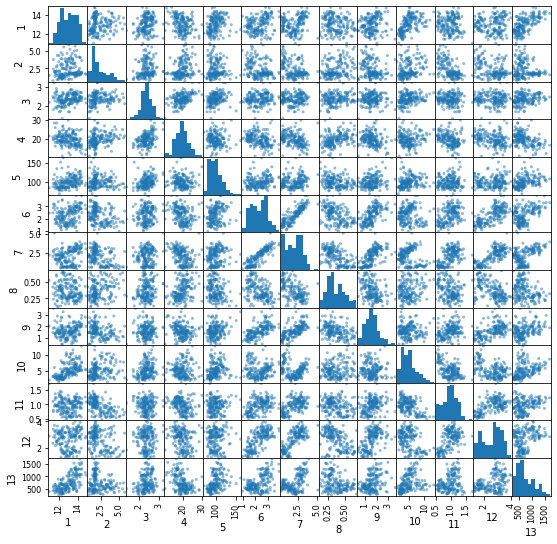

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

pd.plotting.scatter_matrix(wine.iloc[:,1:], figsize=(9,9))
plt.show()

> Many features that at least visually seem to be highly correlated.

#### Step 1: Split and Scale data

In [3]:
from sklearn.model_selection import train_test_split

X, y = wine.iloc[:, 1:].values, wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    stratify=y, 
                                                    random_state=0
                                                   )

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std  = sc.transform(X_test)

#### Step 2: Covariance Matrix
Pairwise covariances between features $j$ and $k$.

$$
\sigma_{jk} = \frac{1}{n-1}\sum{_{i=1}^n}(x_j^{(i)}-\mu_k)
$$

Since the data is standardized, $\mu_k = 0$, so a positive covariance means the features increase together.

In [4]:
import numpy as np

cov_mat = np.cov(X_train_std.T)
print(cov_mat.round(1))

[[ 1.   0.1  0.2 -0.4  0.3  0.3  0.2 -0.1  0.1  0.5  0.1 -0.   0.6]
 [ 0.1  1.   0.1  0.3 -0.1 -0.3 -0.4  0.3 -0.2  0.2 -0.6 -0.4 -0.2]
 [ 0.2  0.1  1.   0.5  0.3  0.2  0.2  0.2 -0.   0.2  0.   0.   0.2]
 [-0.4  0.3  0.5  1.  -0.1 -0.3 -0.3  0.3 -0.2 -0.1 -0.2 -0.2 -0.5]
 [ 0.3 -0.1  0.3 -0.1  1.   0.3  0.2 -0.3  0.2  0.2  0.1  0.1  0.4]
 [ 0.3 -0.3  0.2 -0.3  0.3  1.   0.9 -0.4  0.6 -0.1  0.5  0.7  0.5]
 [ 0.2 -0.4  0.2 -0.3  0.2  0.9  1.  -0.5  0.6 -0.2  0.6  0.8  0.5]
 [-0.1  0.3  0.2  0.3 -0.3 -0.4 -0.5  1.  -0.4  0.2 -0.4 -0.6 -0.3]
 [ 0.1 -0.2 -0.  -0.2  0.2  0.6  0.6 -0.4  1.  -0.   0.3  0.5  0.3]
 [ 0.5  0.2  0.2 -0.1  0.2 -0.1 -0.2  0.2 -0.   1.  -0.5 -0.5  0.3]
 [ 0.1 -0.6  0.  -0.2  0.1  0.5  0.6 -0.4  0.3 -0.5  1.   0.6  0.4]
 [-0.  -0.4  0.  -0.2  0.1  0.7  0.8 -0.6  0.5 -0.5  0.6  1.   0.3]
 [ 0.6 -0.2  0.2 -0.5  0.4  0.5  0.5 -0.3  0.3  0.3  0.4  0.3  1. ]]


#### Step 3: Eigenpairs of Covariance Matrix
Extracted the 13 eigenvalues, same as $d$.

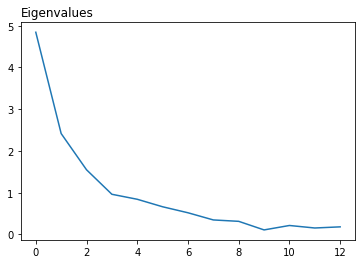

In [5]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

plt.plot(eigen_vals)
plt.title('Eigenvalues', loc='left')
plt.show()

#### Step 4: Sort & Step 5: Selecting the meaning $k$ Eigenvalues
- Eigenvalues define the magnitude of the eigenvector, so they need to be sorted.  
- Want to select the top $k$, usually based on how much variance they explain.

$$
\text{Explained variance ratio} = \frac{\lambda_j}{\sum \lambda_j}
$$

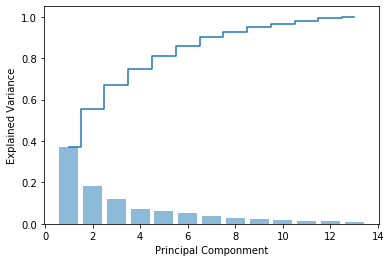

In [6]:
tot = sum(eigen_vals)

var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='Variance Explained')
plt.step(range(1,14), cum_var_exp, where='mid', label='Cumulative Explained')
plt.xlabel('Principal Componment')
plt.ylabel('Explained Variance')
plt.show()

- First component explains nearly 40% of the variance in the data.  
- First and second explain almost 60%. So we'll set $k=2$.  
- Altogether they will sum to 100%.

#### Step 6: Projection Matrix 

In [7]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

Extract first $2$ eigenvectors:

In [8]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
              eigen_pairs[1][1][:, np.newaxis]))

print(w)

[[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


#### Step 7: Transform
$$
X'=XW
$$

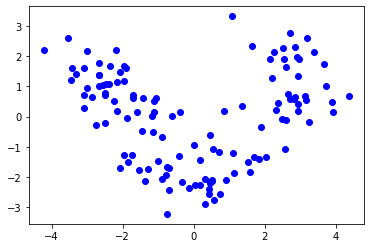

In [9]:
X_train_pca = X_train_std.dot(w)

plt.plot(X_train_pca[:,0], X_train_pca[:,1], 'bo')
plt.show()

### Reconstruction

$$
X_{recovered}=X_{d-projection}W_{d}^T
$$

### Using within a Model
- $k$ can be treated as a hyperparameter.  
- Use GridSearch to determine the best value for $k$.  
- You could also look at the explained variance plot and look for an elbow, but that isn't going to be as quantitatively based and may not maximize predictive performance.

In [10]:
wine.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065


In [11]:
wine.iloc[:, 0].value_counts()

2    71
1    59
3    48
Name: 0, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine.iloc[:, 1:],
                                                   wine.iloc[:, 0],
                                                   test_size=0.20
                                                   )

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

p = Pipeline([('scaling', StandardScaler()), 
              ('pca', PCA()),
              ('model', LogisticRegression())
             ])

params = {'model__C': [0.01, 0.1, 1, 10], 'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

wine_search = GridSearchCV(p, param_grid=params, scoring='accuracy', cv=10, refit=True)
wine_search = wine_search.fit(X_train, y_train)

wine_search.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=10)),
                ('model', LogisticRegression(C=1))])

In [13]:
print(f'Validation score: {wine_search.best_score_:.2%}')
print(f'Test score: {wine_search.score(X_test, y_test):.2%}')

Validation score: 97.90%
Test score: 97.22%


### Using with Visualization
If using to visualize the data, it will only make sense to look at 2 or 3 components.

In [14]:
X, y = wine.iloc[:, 1:], wine.iloc[:, 0]

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

p = Pipeline([('scaling', StandardScaler()), 
              ('pca', PCA(n_components=3))
             ])

new_X = p.fit_transform(X)
new_X = pd.DataFrame(new_X)
new_wine = pd.concat([new_X, pd.Series(y)], axis=1)
new_wine.columns = ['comp1', 'comp2', 'comp3', 'class']
new_wine['class'] = new_wine['class'].astype('str')
new_wine.head()

,comp1,comp2,comp3,class
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1


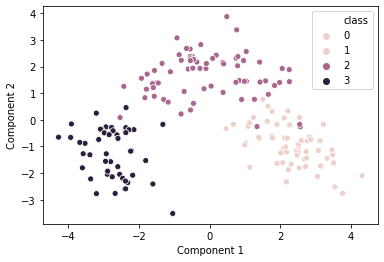

In [15]:
import seaborn as sns

sns.scatterplot(x='comp1', y='comp2', hue='class', data=new_wine)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

> Can help visualize if the 1st and 2nd (and/or 3rd) have a high cumulative explained variance ratio, otherwise, may not help if you have trying to visualize distance between classes.

## Example with MNIST

In [16]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [17]:
mnistX = mnist['data']
mnistX.shape

(70000, 784)

In [18]:
mnistY = mnist['target']
mnistY.shape

(70000,)

#### Sample to make this run faster

In [19]:
samples = 2500

mnist_sample = mnist.data.sample(2500)
mnist_sample_targets = mnist.target.iloc[mnist_sample.index.tolist()]

### See if PCA is beneficial for reducing the space
Original space is 784 dimensions.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist_sample,
                                                   mnist_sample_targets,
                                                   test_size=0.20
                                                   )

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

p = Pipeline([('scaling', StandardScaler()), 
              ('pca', PCA()),
              ('model', LogisticRegression(solver='liblinear'))
             ])

params = {'model__C': [0.01, 1], 'pca__n_components': [100, 200, 500]}

mnist_search = GridSearchCV(p, param_grid=params, scoring='accuracy', cv=10, refit=True)
mnist_search = mnist_search.fit(X_train, y_train)

mnist_search.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=100)),
                ('model', LogisticRegression(C=1, solver='liblinear'))])

In [21]:
print(f'Validation score: {mnist_search.best_score_:.2%}')
print(f'Test score: {mnist_search.score(X_test, y_test):.2%}')

Validation score: 88.50%
Test score: 87.20%


#### MNIST Compression

In [22]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

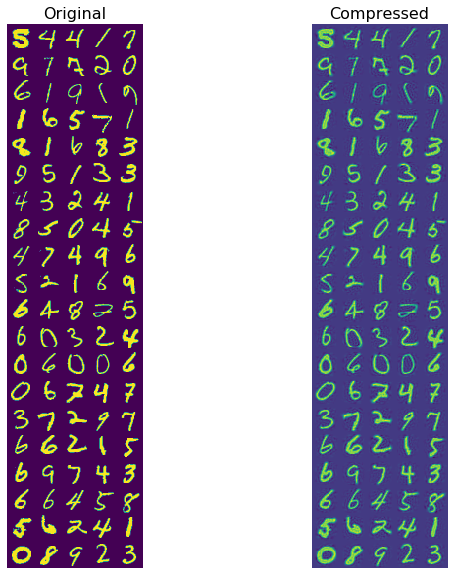

In [23]:
def plot_digits(instances, images_per_row=5, **options):
    '''
    From: https://github.com/ageron/handson-ml2/blob/master/08_dimensionality_reduction.ipynb
    '''
    size = 28
    images_per_row = min(len(instances), images_per_row)

    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, **options)
    plt.axis("off")
    
plt.figure(figsize=(10, 10))
plt.subplot(121)
plot_digits(X_train[::20])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::20])
plt.title("Compressed", fontsize=16)
plt.show()

### Wrapping up PCA
- PCA can be useful reducing the dimensions without significantly loss of information.  
- The number of components needs to be treated as a hyperparameter.
- PCA uses singular value decomposition (SVD), but scikit-learn has solvers that approximate SVD that are dramatically faster. It generally uses this `randomized` solver, but it may use the `full` SVD.  
- There is a variant, `Incrementail PCA` that allows for only part of the dataset to be loaded at once. We'll talk about this more later, but it is an option for larger datasets.

# Kernel PCA
Maps samples into a higher dimensional space, which allows for non-linear transformations, which we've seen previously with kernels in support vector machines.

<img src='files/diagrams/sklearn-kernel-pca.png' style='width: 600px'>

[Image source: scikit-learn](https://scikit-learn.org/stable/modules/decomposition.html#kernel-pca)


See [Scholkopf's notes on *Kernel Principal Component Analysis*](http://pca.narod.ru/scholkopf_kernel.pdf)

- While PCA and KernelPCA are unsupervised, KernelPCA doesn't have some of the features as PCA.  
- No explained variance methods, so we have to rely on predictive performance and hyperparameter tuning.  
- Best to use this as a step within a pipeline and try different kernels and components extracted during grid search.  
- Another option is to look at the reconstruction / compression error and pick the hyperparameters that offer the lowest reconstruction error. This would be similar to the above example using the MNIST data.

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import KernelPCA

p = Pipeline([('scaling', StandardScaler()), 
              ('kpca', KernelPCA()),
              ('model', LogisticRegression(solver='liblinear'))
             ])

params = {'model__C': [0.01, 1],
          'kpca__n_components': [10, 100, 200],
          'kpca__kernel': ['poly', 'rbf']
         }

mnist_search = GridSearchCV(p, param_grid=params, scoring='accuracy', cv=10, refit=True)
mnist_search = mnist_search.fit(X_train, y_train)

mnist_search.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()),
                ('kpca', KernelPCA(kernel='poly', n_components=200)),
                ('model', LogisticRegression(C=1, solver='liblinear'))])

In [26]:
print(f'Validation score: {mnist_search.best_score_:.2%}')
print(f'Test score: {mnist_search.score(X_test, y_test):.2%}')

Validation score: 89.00%
Test score: 88.60%


> Not much improvement in the MNIST data. We would see a pronounced difference if the data was similar to the first figure in this section, i.e., highly non-linear.

# Linear Discriminant Analysis (LDA)
- Similar in concept to PCA and will have many of the same methods, e.g., `explained_variance_ratio_`.  
- Actually a supervised learning algorithm.  
- Looks at finding axes (hyperplanes) that discriminant the most between classes.  
- Unlike PCA, this keeps the classes as far apart as possible, which isn't a trait of PCA.  
- Though you'd assume this may work better than PCA, generally PCA is a better option.

<img src='files/diagrams/lda5-6.png' style='width: 600px'>

[Image source Machine Learning with Python 3rd Edition, page 160](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch05/images)

- LDA assumes the data is normally distributed.  
- In the above, `LD 1` would separate the classes well.  
- `LD 2`wouldn't be a good discriminant since it wouldn't separate the data if you were able to draw a horizontal line on the y-axis.  
- Similar to linear regression, it assumes independence between the samples, which is really a soft requirement, as it can still work reasonably well if that is violated.

### Basic Steps with LDA
- Standardize the $d$-dimensional dataset.  
- Compute the $d$-dimensional mean vector.  
- Create between-class scatter matrix, $S_B$ adn within-class scatter matrix, $S_w$.  
- Calculate eigenvectors and eigenvalues for $S_{W}^{-1}S_B$.  
- Sort the eigenvalues to rank eigenvectors.  
- Pick $k$ eigenvectors and create a $d\times k$-dimensional matrix, $W$.  
- Project examples using $W$.

> If there is perfect collinearity, only one component will be returned. This should be very rare and more a byproduct of a potential error in your analysis.

Similar steps to PCA. The class label comes into play with the mean vector.

See [Machine Learning with Python 3rd Edition, Pages 161-164 for manual implementation](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch05).

In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(wine.iloc[:, 1:],
                                                   wine.iloc[:, 0],
                                                   test_size = 0.2
                                                   )

ss = StandardScaler()
x_train_scale = ss.fit_transform(X_train)

lda = LDA(n_components=2)
x_train_lda = lda.fit_transform(x_train_scale, y_train)

x_train_lda[:5, :]

array([[-3.02072215,  0.40764702],
       [ 4.13789068,  3.08349619],
       [-2.98065138,  2.43712003],
       [-2.54485154,  0.08375584],
       [ 0.89881359, -3.18773281]])

In [58]:
lda.explained_variance_ratio_

array([0.68142116, 0.31857884])

> Outputs components and their explained variance ratios, similar to PCA

In [52]:
lda.score(x_train_scale, y_train)

1.0

In [53]:
x_test_scale = ss.transform(X_test)

lda.score(x_test_scale, y_test)

1.0

> And the same prediction methods from other classifiers

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine.iloc[:, 1:],
                                                   wine.iloc[:, 0],
                                                   test_size=0.20
                                                   )

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

p = Pipeline([('scaling', StandardScaler()), 
              ('lda', LDA()),
              ('model', LogisticRegression(solver='liblinear'))
             ])

params = {'model__C': [0.001, 0.1, 1, 10], 'lda__n_components': [1, 2]}

wine_search = GridSearchCV(p, param_grid=params, scoring='accuracy', cv=10, refit=True)
wine_search = wine_search.fit(X_train, y_train)

wine_search.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()),
                ('lda', LinearDiscriminantAnalysis(n_components=2)),
                ('model', LogisticRegression(C=1, solver='liblinear'))])

In [65]:
print(f'Validation score: {wine_search.best_score_:.2%}')
print(f'Test score: {wine_search.score(X_test, y_test):.2%}')

Validation score: 99.29%
Test score: 97.22%


> Near perfect accuracy on the `wine` data, though PCA had similar performance, albeit with more components.

# Manifold Learning
[Approach for nonlinear dimension reduction](https://scikit-learn.org/stable/modules/manifold.html).

<img src='files/diagrams/manifold.png'>

[Image source scikit-learn manifold](https://scikit-learn.org/stable/modules/manifold.html#manifold)

- Looks for how examples relate linearly to their closest neighbors.  
- Looks for lower dimensions that preserve those relations.  
- Very common for visualizing higher dimension data.
- Here's a [short video](https://www.youtube.com/watch?v=wvsE8jm1GzE) that describes the concept at a high-level.  
- Most common use-case for these is visualization. See [the embedding projector](https://projector.tensorflow.org/) for an interesting example.

## t-SNE
From [sci-kit learn](https://scikit-learn.org/stable/modules/manifold.html):
>t-SNE (TSNE) converts affinities of data points to probabilities. The affinities in the original space are represented by Gaussian joint probabilities and the affinities in the embedded space are represented by Student’s t-distributions. This allows t-SNE to be particularly sensitive to local structure and has a few other advantages over existing techniques:

- Revealing the structure at many scales on a single map  
- Revealing data that lie in multiple, different, manifolds or clusters  
- Reducing the tendency to crowd points together at the center  
- While Isomap, LLE and variants are best suited to unfold a single continuous low dimensional manifold, t-SNE will focus on the local structure of the data and will tend to extract clustered local groups of samples as highlighted on the S-curve example. This ability to group samples based on the local structure might be beneficial to visually disentangle a dataset that comprises several manifolds at once as is the case in the digits dataset.

> The Kullback-Leibler (KL) divergence of the joint probabilities in the original space and the embedded space will be minimized by gradient descent. Note that the KL divergence is not convex, i.e. multiple restarts with different initializations will end up in local minima of the KL divergence. Hence, it is sometimes useful to try different seeds and select the embedding with the lowest KL divergence.

The disadvantages to using t-SNE are roughly:

- t-SNE is computationally expensive, and can take several hours on million-sample datasets where PCA will finish in seconds or minutes  
- The Barnes-Hut t-SNE method is limited to two or three dimensional embeddings.  
- The algorithm is stochastic and multiple restarts with different seeds can yield different embeddings. However, it is perfectly legitimate to pick the embedding with the least error.  
- Global structure is not explicitly preserved. This problem is mitigated by initializing points with PCA (using init='pca').

[See *How to Use t-SNE Effectively* for best practices and tuning tips.](https://distill.pub/2016/misread-tsne/)

#### Attempting to use PCA to visualize the MNIST data

Completed in 0:00:00.137903


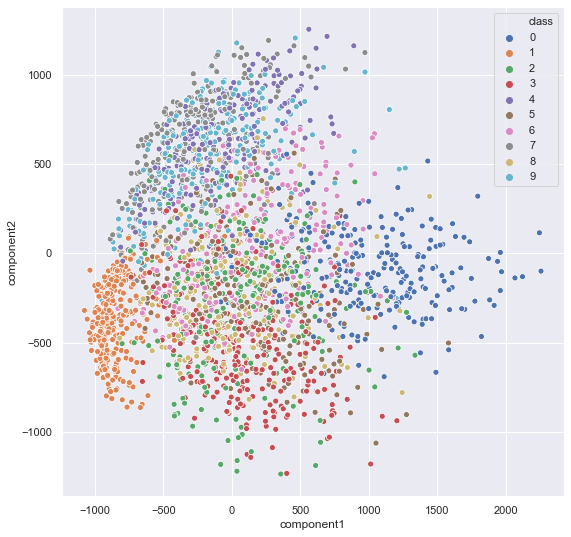

In [74]:
from sklearn.decomposition import PCA
import datetime

ts_start = datetime.datetime.now()
pca = PCA(n_components=2).fit_transform(mnist_sample)

ts_end = datetime.datetime.now()

print(f'Completed in {ts_end-ts_start}')

pca_df = pd.DataFrame(pca)
pca_df.index = mnist_sample.index.tolist()
pca_df.columns = ['component1', 'component2']

pca_df = pd.concat([pca_df, mnist_sample_targets], axis=1)

import seaborn as sns

sns.set(rc={'figure.figsize':(9,9)})
sns.scatterplot(x='component1', y='component2', hue='class', data=pca_df)
plt.show()

> PCA doesn't visually separate the data well.

#### t-SNE

Completed in 0:00:08.149179


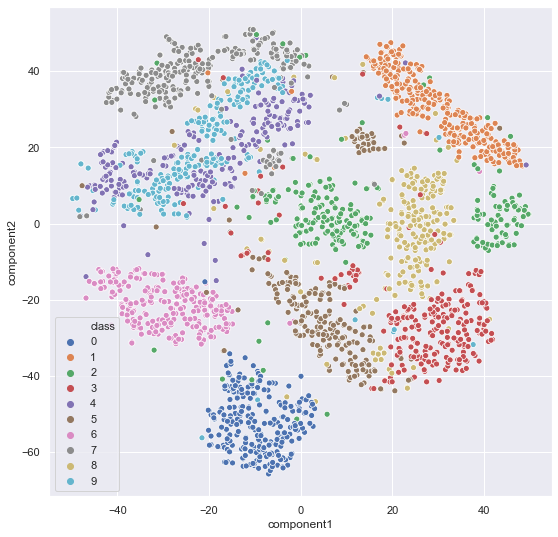

In [71]:
from sklearn.manifold import TSNE
import datetime

ts_start = datetime.datetime.now()
tsne = TSNE(n_components=2, 
            init='random', 
            learning_rate='auto', 
            perplexity=30).fit_transform(mnist_sample)

ts_end = datetime.datetime.now()

print(f'Completed in {ts_end-ts_start}')

tsne_df = pd.DataFrame(tsne)
tsne_df.index = mnist_sample.index.tolist()
tsne_df.columns = ['component1', 'component2']

tsne_df = pd.concat([tsne_df, mnist_sample_targets], axis=1)

import seaborn as sns

sns.set(rc={'figure.figsize':(9,9)})
sns.scatterplot(x='component1', y='component2', hue='class', data=tsne_df)
plt.show()

Completed in 0:00:05.152792


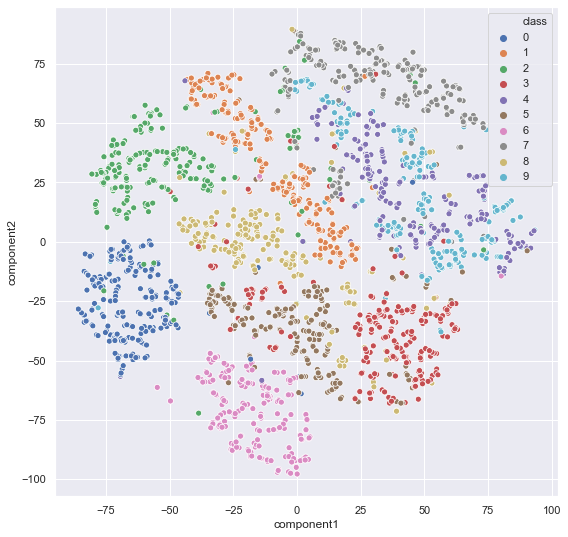

In [72]:
from sklearn.manifold import TSNE
import datetime

ts_start = datetime.datetime.now()
tsne = TSNE(n_components=2, 
            init='random', 
            learning_rate='auto', 
            perplexity=5).fit_transform(mnist_sample)

ts_end = datetime.datetime.now()

print(f'Completed in {ts_end-ts_start}')

tsne_df = pd.DataFrame(tsne)
tsne_df.index = mnist_sample.index.tolist()
tsne_df.columns = ['component1', 'component2']

tsne_df = pd.concat([tsne_df, mnist_sample_targets], axis=1)

import seaborn as sns

sns.set(rc={'figure.figsize':(9,9)})
sns.scatterplot(x='component1', y='component2', hue='class', data=tsne_df)
plt.show()

- Cluster size isn't meaningful. 
- May change shape given hyperparameter settings.  
- Cluster closeness may not be meaningful.  

# Non-negative Matrix Factorization
- Technique to decompose a matrix into the product of two matrices that approximate the original matrix.  
- Can be used for recommendation / collaborative filtering.

We have an original matrix, $V$, and the goal is to find two new matrices, $H$ and $W$, that when multiplied together approximate $V$. This approximated $V$ contains no zeros, and values that were zero and replaced by an estimated floating point value.  
- Per the title, these matrices, including $V$, cannot contain negative numbers.  
- Ideal for using for counts of items purchased and other events that cannot be negative.  

<img src='files/diagrams/nmf.png' style='width: 500px'>

[Image source: Wikipedia](https://en.wikipedia.org/wiki/Non-negative_matrix_factorization#/media/File:NMF.png)

This doesn't have an exact solution, so it is solved with approximation, with the aim of minimizing the distance, $d$, between $V$ and $WH$.

It uses the squared Frobenius norm for distance, which is essentially Euclidean distance for matrices.  

$$
d_{Fro}(V,WH)=\frac{1}{2}||V-WH||_{Fro}^2=\frac{1}{2}\sum(V_{ij}-WH_{ij})^2
$$

In [85]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF

V = np.array([[12,11,3,4,6,4,4],
              [12,3,6,5,6,4,3],
              [7 ,3,4,0,5, 1,2],
              [7 ,4,3,6,5, 1,2],
              [5 ,0,0,0,2,2,2],
              [3 ,1, 3,0,6,3,2]])

V

array([[12, 11,  3,  4,  6,  4,  4],
       [12,  3,  6,  5,  6,  4,  3],
       [ 7,  3,  4,  0,  5,  1,  2],
       [ 7,  4,  3,  6,  5,  1,  2],
       [ 5,  0,  0,  0,  2,  2,  2],
       [ 3,  1,  3,  0,  6,  3,  2]])

In [86]:
V = pd.DataFrame(V, columns=['Chris', 'Kim', 'Brian', 'Billy', 'Devin', 'John', 'Joe'])
V.index = ['Batman', 'Superman', 'Green Lantern', 'Aquaman', 'Flash', 'Cyborg']

V

,Chris,Kim,Brian,Billy,Devin,John,Joe
Batman,12,11,3,4,6,4,4
Superman,12,3,6,5,6,4,3
Green Lantern,7,3,4,0,5,1,2
Aquaman,7,4,3,6,5,1,2
Flash,5,0,0,0,2,2,2
Cyborg,3,1,3,0,6,3,2


In [87]:
from sklearn.decomposition import NMF

nmf = NMF(init=None, max_iter=1000)
nmf.fit(V)

H = pd.DataFrame(nmf.components_, columns=V.columns)
H

,Chris,Kim,Brian,Billy,Devin,John,Joe
0,1.814957,0.560135,0.927393,0.000000,0.585040,0.181903,0.296289
1,0.103653,1.409319,0.000000,0.042202,0.467059,0.001383,0.093409
2,1.377879,0.716569,1.436010,0.000000,2.952491,0.042458,0.804200
3,0.091419,0.000000,2.584623,0.000000,4.230512,4.450482,0.704766
4,1.353927,0.000000,0.000000,0.000198,0.665888,0.242559,0.426826
5,1.411895,0.000000,0.000000,0.000000,0.336571,1.112928,0.775140
6,1.127113,0.269762,0.397901,2.970762,0.000000,0.006897,0.013804


In [88]:
W = pd.DataFrame(nmf.transform(V), columns=V.columns)
W.index = V.index

W

,Chris,Kim,Brian,Billy,Devin,John,Joe
Batman,2.696792,6.493272,0.000000,0.000000,0.562938,3.014804,1.254178
Superman,3.927381,0.002566,0.478094,0.386720,0.321704,1.307956,1.682918
Green Lantern,2.730422,0.524793,1.019275,0.001273,0.009748,0.405951,0.000000
Aquaman,0.734963,1.626540,1.057088,0.001755,0.744371,0.555138,1.996460
Flash,0.000000,0.000002,0.000000,0.000046,2.354264,1.283757,0.000000
Cyborg,0.000813,0.065013,1.266980,0.455830,0.038967,0.816552,0.000000


In [89]:
reconstructed = pd.DataFrame(np.dot(W,H), columns=V.columns)
reconstructed.index = V.index

print('Original\n')
print(V)

print('\nReconstructed\n')
print(np.round(reconstructed,4))

Original

               Chris  Kim  Brian  Billy  Devin  John  Joe
Batman            12   11      3      4      6     4    4
Superman          12    3      6      5      6     4    3
Green Lantern      7    3      4      0      5     1    2
Aquaman            7    4      3      6      5     1    2
Flash              5    0      0      0      2     2    2
Cyborg             3    1      3      0      6     3    2

Reconstructed

                 Chris      Kim   Brian   Billy   Devin    John     Joe
Batman         12.0000  11.0000  3.0000  4.0000  6.0000  4.0000  4.0000
Superman       12.0015   3.0001  5.9979  4.9997  6.0009  4.0011  2.9953
Green Lantern   7.0009   2.9994  3.9992  0.0221  5.0004  1.0005  1.9974
Aquaman         7.0011   4.0000  2.9985  5.9998  5.0007  1.0008  1.9966
Flash           5.0000   0.0000  0.0001  0.0005  1.9999  2.0000  2.0000
Cyborg          3.0013   1.0000  2.9983  0.0028  6.0008  3.0009  1.9960


### Filtering and Sorting to Recommend A New Item
Find items they already have:

In [90]:
prsn = 'Billy'

doesNotHave = V.loc[V['Billy']==0, :].index.tolist()
print(*doesNotHave)

Green Lantern Flash Cyborg


Filter those items out from the reconstructed matrix and sort the values high to low and pick the first comic.

In [91]:
reconstructed.loc[doesNotHave, prsn].sort_values(ascending=False).index[0]

'Green Lantern'

> Can also use NMF for topic extraction and segmentation.

# Readings

- [Machine Learning with Python 3rd Edition, Chapter 5](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch05)  
- [Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow, Chapter 8](https://github.com/ageron/handson-ml2/blob/master/08_dimensionality_reduction.ipynb)
- [t-SNE Wiki](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)  
- [t-SNE Papers by Laurens van der Maaten](https://lvdmaaten.github.io/tsne/)
- [Non-negative Matrix Factorization Wiki](https://en.wikipedia.org/wiki/Non-negative_matrix_factorization)  
- [Non-negative Matrix Factorization Example](https://medium.com/logicai/non-negative-matrix-factorization-for-recommendation-systems-985ca8d5c16c)